Para resolver este ejercicio, primero definimos la función de Likelihood y las probabilidades posteriores, aplicando el teorema de Bayes. En este caso, queremos determinar la probabilidad posteriori del sesgo de la moneda (p), basándonos en el número de caras y secas observadas, utilizando dos priors: uno uniforme y otro gaussiano.La idea es comparar ambas distribuciones.
Se busca aplicar el teorema de Bayes para estimar el parámetro p (la probabilidad de obtener cara al lanzar una moneda cargada), usando datos observados en un experimento donde se arroja una moneda 100 veces y se obtiene 60 caras y 40 secas. La obtencion del parametro p se realiza utilizando dos tipos de prior: uno uniforme y otro gaussiano. La idea es comparar los resultados obtenidos con ambos prior.
En principio se debe definir la funcion de verosimilitud o likelihood, aqui se aplica una funcion binomial.

La probabilidad de obtener \( k \) caras en \( n \) lanzamientos, dada una probabilidad \( p \), está dada por la distribución binomial:

$$
L(p) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

Según el teorema de Bayes, la probabilidad posterior de \( p \) dados los datos observados \( D \) es proporcional a la verosimilitud multiplicada por el prior:

\[
P(p \mid D) = \frac{L(p) P(p)}{P(D)}
\]

Donde \( P(p) \) es el prior y \( P(D) \) es la probabilidad marginal de los datos, que se usa para normalizar la distribución posterior. En este caso, la normalización se realiza dividiendo por la integral de \( L(p) P(p) \) sobre todo el espacio de \( p \).

El prior uniforme es la distribución más simple, donde todas las probabilidades de \( p \) son igualmente probables. Se define como:

\[
P(p) = 1 \quad \text{para} \quad p \in [0, 1]
\]

Esto significa que, antes de observar los datos, asumimos que todas las probabilidades de obtener una cara son igualmente probables en el rango \( [0, 1] \).

El prior gaussiano es una distribución normal centrada en \( \mu = 0.5 \) con una desviación estándar de \( \sigma = 0.1 \). Esto refleja que, la probabilidad de obtener cara es probablemente cerca de 0.5, con una cierta incertidumbre.

\[
P(p) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(p - \mu)^2}{2 \sigma^2}\right)
\]

En este caso, \( \mu = 0.5 \) y \( \sigma = 0.1 \).

Se usa la verosimilitud y el prior para calcular la probabilidad posterior.
\[
P(p \mid D) \propto P(D \mid p) P(p)
\]

Donde:

\begin{itemize}
    \item \( P(p) \) es el \textbf{prior} (probabilidad previa de los valores de \( p \)).
    \item \( P(D \mid p) \) es la \textbf{verosimilitud} de los datos dados los valores de \( p \).
\end{itemize}
Luego, la normalizamos para que la distribución posterior sume a 1. Esto se realiza tanto para el prior uniforme como para el prior gaussiano.


In [1127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as st
from math import comb

In [1128]:
Tiros=100
caras=60
secas=40

In [1129]:
#Definimos la funcion verosimilitud, distribucion binomial
def likelihood(p,k,n):
    L=comb(n,k)*(p**k)*((1-p)**(n-k))
    return(L)

In [1130]:
likelihood(p=100,k=60,n=100)

919584243022829686424313608970901706545258034539779347691797145274851643542927045193944587623372562004489720000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [1131]:
#Queremos definir los priors, para esto necesitamos darle una suerte de condicion.

def priors_uniforme(p):
    if 0<=p<=1: 
        return(1) # Prior uniforme, constante en [0, 1]
    else:
        return(0)

In [1132]:
print(priors_uniforme(p=0.1))
print(priors_uniforme(2))

1
0


In [1133]:
#Ahora para definir la probabilidad posterior solo se multiplica el likelihood por el prior
def probabilidad_posterior_uniforme(p,k,n):
    L=likelihood(p,k,n)
    P=priors_uniforme(p)
    prob_post=L*P
    return(prob_post)

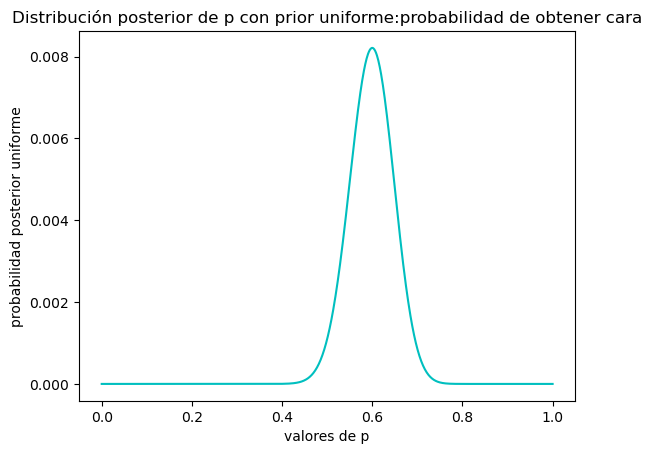

In [1134]:
#Grafiquemos la probabilidad uniforme en principio
valores_p=np.linspace(0,1,1000)
probabilidades_unif = [] 
for p in valores_p:
    probabilidad = probabilidad_posterior_uniforme(p, caras, Tiros)
    probabilidades_unif.append(probabilidad)
p_unif_norm=probabilidades_unif/np.sum(probabilidades_unif)
plt.plot(valores_p,p_unif_norm,color='#00BFBF')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior uniforme')
plt.title('Distribución posterior de p con prior uniforme:probabilidad de obtener cara')
plt.savefig('Distrib_prior_unif.pdf', dpi=300, bbox_inches='tight')

plt.show()

Ahora queremos definir la distribucion gaussiana, ya tenemos definida la funcion likelihood, nos faltaria definir los prior gaussianos y luego la probabilidad posterior gaussiana.

In [1135]:
def priors_gaussiano(p,mu=0.5,sigma=0.1):
    P= st.norm.pdf(p,mu,sigma) # Prior gaussiano centrado en 0.5 con desviación estándar 0.1
    return(P)

In [1136]:
def probabilidad_posterior_gaussiana(p,k,n):
    P=priors_gaussiano(p,mu=0.5,sigma=0.1)
    L=likelihood(p,k,n)
    prob_post=P*L
    return(prob_post)

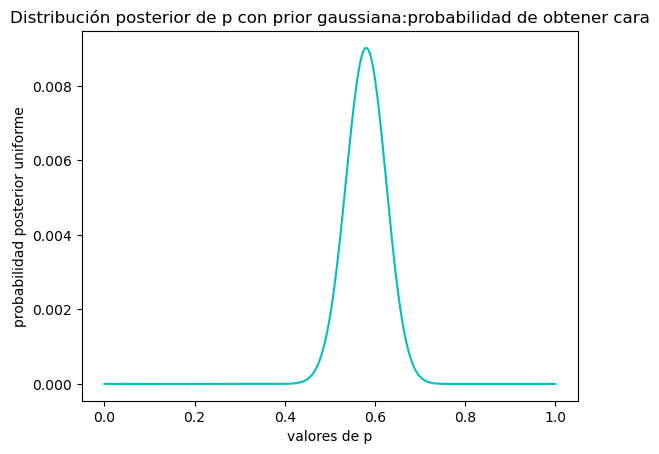

In [1137]:
#Grafiquemos la probabilidad uniforme en principio
valores_p=np.linspace(0,1,1000)
probabilidades_gauss = [] 
for p in valores_p:
    probabilidad = probabilidad_posterior_gaussiana(p, caras, Tiros)
    probabilidades_gauss.append(probabilidad)
p_gauss_norm=probabilidades_gauss/np.sum(probabilidades_gauss)
plt.plot(valores_p,p_gauss_norm,color='#00BFBF')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior uniforme')
plt.title('Distribución posterior de p con prior gaussiana:probabilidad de obtener cara')
plt.savefig('Distrib_prior_gaus.pdf', dpi=300, bbox_inches='tight')

plt.show()

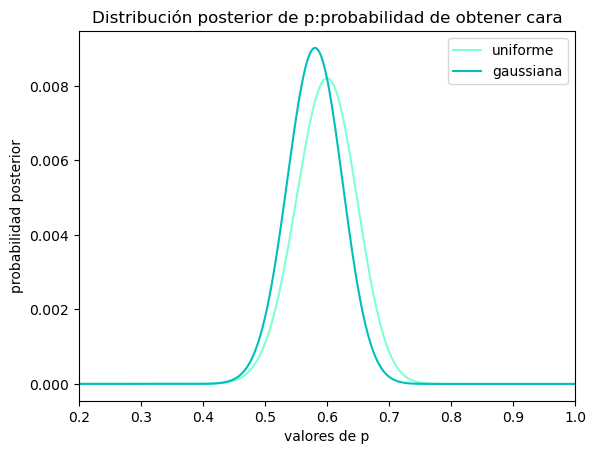

0.001
0.0009999999999999998


In [1153]:
plt.plot(valores_p,p_unif_norm,color='aquamarine',label='uniforme')
plt.plot(valores_p,p_gauss_norm,color='#00BFBF',label='gaussiana')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior')
plt.title('Distribución posterior de p:probabilidad de obtener cara')
plt.legend()
plt.savefig('Distrib_prior_comparacion-gauss-uniforme.pdf', dpi=300, bbox_inches='tight')
plt.xlim(0.2,1.0)
plt.show()
media_gauss=np.mean(p_gauss_norm)
media_unif=np.mean(p_unif_norm)
print(media_gauss)
print(media_unif)

 Ejercicio 8. Frecuentistas vs Bayesianos
Supongase que se mide el tiempo de decaimiento de una part ́ıcula, el cual es modelado como una
funcion exponencial con constante de decaimiento λ.

- Simule 50 mediciones del tiempo de decaimiento.

- Estime λ utilizando el estimador de Maximum Likelihood.

- Estime λ utilizando inferencia Bayesiana asumiendo un prior plano.

- Compare las dos estimaciones.

 Suponiendo que el tiempo de decaimiento de una partícula, modelado como una función exponencial con una constante de decaimiento $\lambda$, se busca comparar la estimación de esta constante mediante dos enfoques: el método frecuentista (Maximum Likelihood Estimation, MLE) y la inferencia bayesiana.

El tiempo de decaimiento de una partícula sigue una distribución exponencial. La Función de Densidad de Probabilidad (PDF) de esta distribución está dada por:

$$
f(t, \lambda) = \lambda e^{-\lambda t}
$$

donde:
- $t$ es el tiempo de decaimiento,
- $\lambda$ es la constante de decaimiento (el parámetro que estamos tratando de estimar).

La Función de Distribución Acumulada (CDF) es:

$$
F(t, \lambda) = 1 - e^{-\lambda t}
$$

Si se genera un número aleatorio uniforme $y$ entre 0 y 1, a su vez se puede generar un valor de $t$ (tiempo de decaimiento) a partir de la función inversa de la CDF:

$$
t = -\frac{\ln(1 - y)}{\lambda}
$$

Con lo cual, permite obtener datos de $t$ a partir de valores aleatorios uniformemente distribuidos.

La estimación de máximo Likelihood (MLE) para el parámetro $(\lambda)$ de una distribución exponencial se obtiene a partir de la función de Likelihood. Dada una muestra de $(n)$ tiempos de decaimiento de esta función es:

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda t_i}
$$

Al tomar el logaritmo, obtenemos la log-verosimilitud o log-likelihood (son lo mismo):

$$
\log \mathcal{L}(\lambda) = n \log \lambda - \lambda \sum_{i=1}^{n} t_i
$$

Maximizando la log-verosimilitud con respecto a $(\lambda)$, derivamos y igualamos a cero, se obtiene la estimación de MLE de $(\lambda)$:

$$
\lambda_{\text{MLE}} = \frac{1}{\langle t \rangle}
$$

donde $(\langle t \rangle)$ es el promedio de los tiempos de decaimiento simulados.

\section*{2. Generación de Mediciones Simuladas}

Para simular mediciones de tiempo de decaimiento, generamos $n$ valores aleatorios uniformemente distribuidos entre 0 y 1. Luego, usamos la función inversa de la CDF para convertir esos valores en tiempos de decaimiento, lo que nos da un conjunto de datos simulados de tiempos de decaimiento.


In [1139]:
#Primero defino las funciones 
#Función de Densidad de Probabilidad
def pdf(t,lam):
    y=lam*(np.exp(-lam*t))
    return(y)

In [1140]:
#Función de Distribución Acumulada
def cdf(t,lam):
    y=(1-np.exp(-lam*t))
    return(y)

In [1141]:
# Inversa de la Función de Distribución Acumulada
def inv_cdf(y,lam):
    t=-(np.log(1-y))/lam
    return(t)

Para simular mediciones de tiempo de decaimiento, generamos nn valores aleatorios uniformemente distribuidos entre 0 y 1. Luego, usamos la función inversa de la CDF para convertir esos valores en tiempos de decaimiento, lo que nos da un conjunto de datos simulados de tiempos de decaimiento.

<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_8008/3801984599.py:16: SyntaxWarning: invalid escape sequence '\l'
  print(f'Estimación de $\lambda$ (MLE):{lambda_mle}')


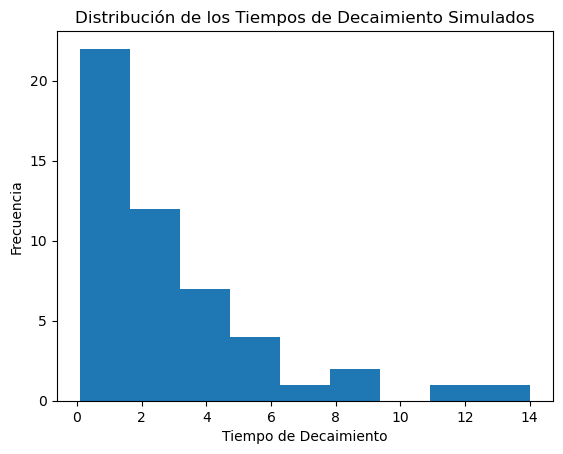

Estimación de $\lambda$ (MLE):0.3534151438546982


In [1142]:
#Vamos a generar 50 mediciones de tiempos de decaimiento usando la función inversa de la CDF
#valores random
n=50 #Define la cantidad de mediciones de tiempo de decaimiento
valores_random=np.random.uniform(0,1,n) #Genera n valores aleatorios uniformemente distribuidos entre 0 y 1, que representarán los valores y en la función inversa de la CDF.
lam_real=0.4 #valor_real_lambda
tiempo_decaimiento=inv_cdf(valores_random,lam_real) #Utiliza la función inversa de la CDF para convertir los valores aleatorios generados en tiempos de decaimiento simulados
#Para una distribución exponencial, el MLE de λ es el inverso del promedio de los tiempos de decaimiento simulados.
lambda_mle=1/np.mean(tiempo_decaimiento)
plt.hist(tiempo_decaimiento,bins='auto')
plt.xlabel('Tiempo de Decaimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Tiempos de Decaimiento Simulados')
plt.savefig('Tiempo-decaimiento.pdf', dpi=300, bbox_inches='tight')

plt.show()
print(f'Estimación de $\lambda$ (MLE):{lambda_mle}')

In [1143]:
def pdf(t, lam):
    y = lam * np.exp(-lam * t)
    #print(f"PDF for lambda={lam}: {y}")  # Esto imprimirá las probabilidades
    return y



In [1144]:
#A continuacion, queremos estimar lambda a partir de Maximum Likelihood.
#Tenemos que definir en principio la funcion likelihood

def log_likelihood(t, lam):
    L_lam = np.sum(np.log(pdf(t, lam)))  # log de las probabilidades de los tiempos de decaimiento
    return L_lam


In [1145]:
#Definimos los prior planos segun la funcion likelihood
def priors_plano(lam):
    if 0 <= lam <= 1: 
        return 1  # Prior uniforme, constante en [0, 1]
    else:
        return 0

La estimación de máxima verosimilitud (MLE) busca el valor de $\lambda$ que maximiza la función de verosimilitud dada por los datos observados. Para una muestra de tiempos de decaimiento $t_1, t_2, \dots, t_n$, la función de verosimilitud es:

$L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda t_i}$

El logaritmo de la verosimilitud es más fácil de manejar:

$\log L(\lambda) = \sum_{i=1}^{n} \log(\lambda) - \lambda t_i$

El valor de $\lambda$ que maximiza la log-verosimilitud es el valor de $\lambda$ que minimiza la suma de los tiempos de decaimiento. En lugar de estimar un único valor para $\lambda$, la inferencia bayesiana calcula una distribución posterior de $\lambda$ dado los datos observados. Asumimos un prior plano (uniforme) para $\lambda$, es decir, que todos los valores posibles de $\lambda$ tienen la misma probabilidad a priori en un rango dado (en este caso, entre 0 y 1).

La probabilidad posterior de $\lambda$, dada la observación de los tiempos de decaimiento, es proporcional a la verosimilitud multiplicada por el prior:

$P(\lambda \mid t) \propto L(\lambda) \cdot P(\lambda)$

En el código:

- La función {log_likelihood} calcula la log-verosimilitud para un valor dado de $\lambda$.
- La función {priors_plano} define el prior uniforme.
- La función {probabilidad_posterior} calcula la probabilidad posterior como el producto de la verosimilitud y el prior.


In [1146]:
#Ahora para definir la probabilidad posterior solo se multiplica el likelihood por el prior
def probabilidad_posterior(t, lam):
    logL = log_likelihood(t, lam)
    L = np.exp(logL)  # Convertir log-likelihood a likelihood
    P = priors_plano(lam)
    return L * P

/tmp/ipykernel_8008/3864157470.py:5: RuntimeWarning: divide by zero encountered in log
  L_lam = np.sum(np.log(pdf(t, lam)))  # log de las probabilidades de los tiempos de decaimiento


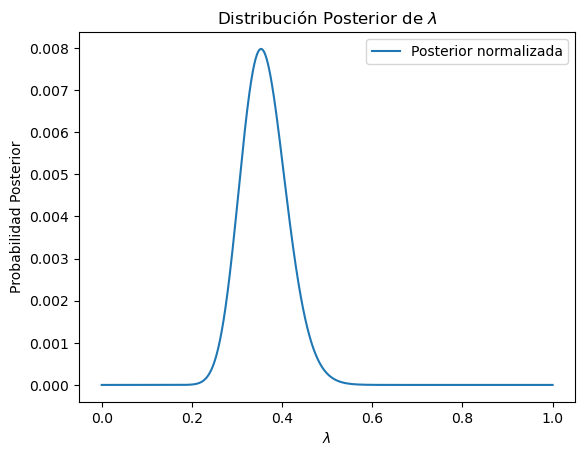

Esta es la media de la probabilidad posterior: 0.3604834467317921
Esta es la desviación estándar de la probabilidad posterior: 0.05047777910803005


In [1147]:
#Vamos a estimar lambda a partir de la funcion log_likelihood
lambda_rango = np.linspace(0, 1, 1000)
# Inicializar posterior como una lista vacía
posterior = []

# Calcular la probabilidad posterior para cada valor en lambda_rango
for lam in lambda_rango:
    pos_prob = probabilidad_posterior(tiempo_decaimiento, lam)
    posterior.append(pos_prob)  # Usar append porque posterior es una lista

# Convertir posterior a un arreglo de numpy para facilitar el cálculo
posterior = np.array(posterior)

# Normalizar la probabilidad posterior
posterior_normalizado = posterior / np.sum(posterior)

# Graficar la distribución posterior normalizada
plt.plot(lambda_rango, posterior_normalizado, label='Posterior normalizada')
plt.xlabel(r'$\lambda$')
plt.ylabel('Probabilidad Posterior')
plt.title(r'Distribución Posterior de $\lambda$')
plt.legend()
plt.savefig('lambda-posterior.pdf', dpi=300, bbox_inches='tight')

plt.show()
# Media y desviación estándar de la posterior
media_post = np.sum(lambda_rango * posterior_normalizado)
desv_post = np.sqrt(np.sum((lambda_rango - media_post)**2 * posterior_normalizado))

print(f'Esta es la media de la probabilidad posterior: {media_post}')
print(f'Esta es la desviación estándar de la probabilidad posterior: {desv_post}')

In [1148]:
# Estimación por Maximum Likelihood (MLE)
lambda_mle = 1 / np.mean(tiempo_decaimiento)
print(f'Estimación de λ (MLE): {lambda_mle}')

# Estimación por Inferencia Bayesiana
# Ya has calculado la media y la desviación estándar de la distribución posterior
print(f'La media de la distribución posterior de λ: {media_post}')
print(f'La desviación estándar de la distribución posterior de λ: {desv_post}')


Estimación de λ (MLE): 0.3534151438546982
La media de la distribución posterior de λ: 0.3604834467317921
La desviación estándar de la distribución posterior de λ: 0.05047777910803005


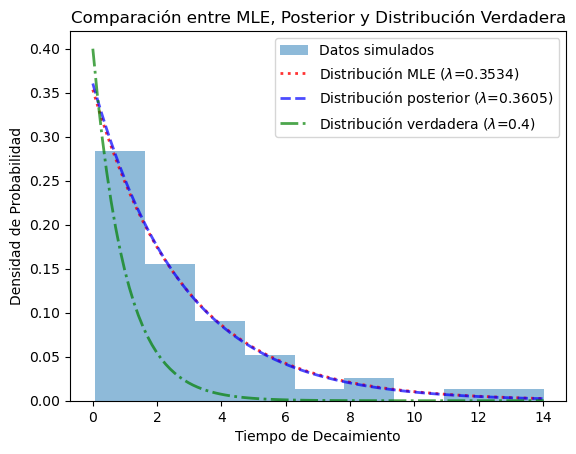

In [1149]:
# Generar el histograma de los datos simulados y asegurarse de que esté normalizado
plt.hist(tiempo_decaimiento, bins='auto', density=True, alpha=0.5, label='Datos simulados')

# Crear un rango de tiempos adecuado para las distribuciones ajustadas
t = np.linspace(0, np.max(tiempo_decaimiento), 100)

# Calcular la función de densidad de probabilidad para el valor estimado por MLE
PDF_MLE = lambda_mle * np.exp(-lambda_mle * t)
plt.plot(t, PDF_MLE, label=f'Distribución MLE ($\\lambda$={lambda_mle:.4f})', color='red', linestyle=':', linewidth=2, alpha=0.8)

# Calcular la función de densidad de probabilidad para la media de la distribución posterior
PDF_Posterior = media_post * np.exp(-media_post * t)
plt.plot(t, PDF_Posterior, label=f'Distribución posterior ($\\lambda$={media_post:.4f})', color='blue', linestyle='--', linewidth=2, alpha=0.7)

# Calcular la función de densidad de probabilidad para el valor "verdadero" de λ
PDF_Verdadera = lam_real * np.exp(-lam * t)
plt.plot(t, PDF_Verdadera, label=f'Distribución verdadera ($\\lambda$={lam_real})', color='green', linestyle='-.', linewidth=2, alpha=0.7)

# Configurar las etiquetas y mostrar el gráfico
plt.xlabel('Tiempo de Decaimiento')
plt.ylabel('Densidad de Probabilidad')
plt.title('Comparación entre MLE, Posterior y Distribución Verdadera')
plt.legend()
plt.savefig('comparacion-MLE-POSTERIOR-VERDADERA.pdf', dpi=300, bbox_inches='tight')

plt.show()
